# Introducción a las Redes Neuronales

Actualmente, las redes neuronales (ANNs) representan una las áreas más activas en inteligencia artificial, siendo claves para la solución de problemas muy complejos como el reconocimiento de imágenes y el procesamiento del lenguaje natural.

Antes de estudiar modelos avanzados es importante tener claros algunos conceptos básicos, pero claves en el diseño de redes neuronales. En este laboratorio exploraremos esos conceptos usando Python, Keras y Scikit-learn. 

Desde el punto de vista más práctico aprenderemos a crear una red neuronal en Keras y a evaluar el efecto sus hiper-parámetros más importantes en problemas de clasificación.

## Lenguaje y Librerías

Todo el código necesario para esta actividad será desarrollado en Python. Usaremos además dos librerías: una de machine learning clásico, denominada scikit-learn y otra especializada en redes neuronales, denominada Keras.


La forma más simple de disponer de las librerías sin instalar nada es ejecutar los notebooks en Google Colab. Si se quiere disponer de ellas localmente, se recomienda la instalación de Anaconda. Si ya tiene disponible ese software y no necesita usar GPUs, los siguientes comandos crear un ambiente con las librerías necesarias.

```
conda create --name LAB2 python=3.6 pandas scikit-learn matplotlib jupyter
conda activate LAB2
conda install -c conda-forge tensorflow keras
conda deactivate LAB2
```


## 1. Armando una Red para Clasificación

Partiremos mostrando como armar una red neuronal para clasificación. Usaremos un dataset sintético que llamaremos XOR, por su similitud con el problema que hacia 1950 se utilizó para mostrar las limitaciones de una neurona artificial. 

Los datos generados serán bidimensionales (dos atributos), podrán pertencer a una de dos posibles clases (roja: 0, verde: 1), y tendrán la distribución que se ilustra a continuación:

<img width='500px' align='left' src='http://jricardon.github.io/BBS19lab2Files/figs/xor.png'>  

Partiremos definiendo la función de crea los datos. Luego la usaremos para simular un conjunto de datos de entrenamiento y de test (pruebas). Graficaremos el resultado para ver si coincide con lo esperado.



(10000, 2)
(10000,)
[0 1]
5000
5000


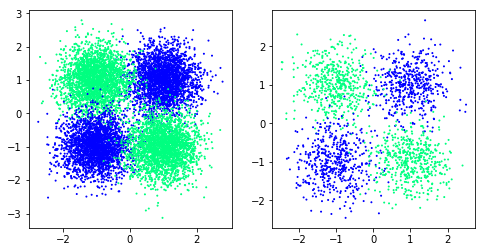

In [81]:
import numpy as np

def do_gaussianXOR(n1=2500,n2=2500, u = 1.0, std = 0.5):
   
    primer_c = np.random.normal(loc=[u,u],scale=std,size=(n1,2))
    segundo_c = np.random.normal(loc=[-u,u],scale=std,size=(n2,2))
    tercer_c = np.random.normal(loc=[-u,-u],scale=std,size=(n1,2))
    cuarto_c = np.random.normal(loc=[u,-u],scale=std,size=(n2,2))
    
    X = np.vstack((primer_c,segundo_c,tercer_c,cuarto_c))
    Y = np.hstack((np.zeros(n1),np.ones(n2),np.zeros(n1),np.ones(n2))) 
    #Y = np.logical_xor(X[:,0] > 0, X[:,1] > 0)
  
    return X, Y.astype(int)
  

X_train,Y_train = do_gaussianXOR()
print(X_train.shape)
print(Y_train.shape)
print(np.unique(Y_train))
print(sum(Y_train==0))
print(sum(Y_train==1))

X_test,Y_test = do_gaussianXOR(n1=500,n2=500)

import matplotlib.pyplot as plt
fig, axis = plt.subplots(1, 2,figsize=(8, 4))
axis[0].scatter(X_train[:,0], X_train[:,1], s=1, c=Y_train, cmap=plt.cm.winter)
axis[1].scatter(X_test[:,0], X_test[:,1], s=1, c=Y_test, cmap=plt.cm.winter)
plt.show()


Crearemos ahora nuestra primera red neuronal. Esta tendrá solo 1 capa oculta con dos neuronas y función de activación sigmoidal. 
  
1.   Para qué sirve la función *summary* de la librería?
2.   ¿Cómo indica el número de atributos de entrada?
3.   ¿Cuántos parámetros tiene la red? ¿Coindice con los esperado?


In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
  
model = Sequential()
model.add(Dense(4, input_dim=X_train.shape[1], activation="sigmoid"))
model.add(Dense(1, activation="sigmoid")) #kernel_initializer='orthogonal'
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


Ahora usaremos los datos generados para entrenar la red. 

1.   ¿Porqué es importante considerar un escalamiento de los datos antes de entrenar? ¿Cómo se hace en el ejemplo?
2.   ¿Para qué sirve la *tasa de aprendizaje* y cómo se le indica al algoritmo de entrenamiento?
3.   ¿Qué es el *número de epochs* y cómo se le indica al algoritmo de entrenamiento?
4.   ¿Qué es el *tamaño de batch* y cómo se le indica al algoritmo de entrenamiento?
5.   ¿Con qué *función de pérdida* (loss) entrenará la red? ¿Es ésta apropiada para el problema que debe resolver?
6. Si entrena la red varias veces, ¿Obtiene siempre el mismo resultado? ¿Porqué?

In [92]:

X_train,Y_train = do_gaussianXOR(u = 1.0, std = 0.25)
X_test,Y_test = do_gaussianXOR(n1=500,n2=500,u = 1.0, std = 0.25)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#myopt = Adam(lr=0.01)
myopt = SGD(lr=0.01)

model.compile(optimizer=myopt, loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs=100, batch_size=128, verbose=1)


print("Train Accuracy: ",model.evaluate(X_train,Y_train, batch_size=128, verbose=0)[1])
print("Test Accuracy: ",model.evaluate(X_test, Y_test,batch_size=128,verbose=0)[1])



Epoch 1/100
10000/10000 [==============================] - 2s 224us/step - loss: 0.6810 - acc: 0.6942
Epoch 2/100
10000/10000 [==============================] - 0s 10us/step - loss: 0.6805 - acc: 0.6763
Epoch 3/100
10000/10000 [==============================] - 0s 10us/step - loss: 0.6799 - acc: 0.6878
Epoch 4/100
10000/10000 [==============================] - 0s 10us/step - loss: 0.6793 - acc: 0.6827
Epoch 5/100
10000/10000 [==============================] - 0s 10us/step - loss: 0.6787 - acc: 0.6730
Epoch 6/100
10000/10000 [==============================] - 0s 10us/step - loss: 0.6781 - acc: 0.6812
Epoch 7/100
10000/10000 [==============================] - 0s 10us/step - loss: 0.6774 - acc: 0.6899
Epoch 8/100
10000/10000 [==============================] - 0s 10us/step - loss: 0.6768 - acc: 0.6781
Epoch 9/100
10000/10000 [==============================] - 0s 10us/step - loss: 0.6761 - acc: 0.6825
Epoch 10/100
10000/10000 [==============================] - 0s 10us/step - loss: 0.6753 - 

Después del entrenamiento, la libería que estamos utilizando retorna el historial del error y de otras métricas que le indiquemos. Esto permite monitorear el entrenamiento y diagnosticar problemas.

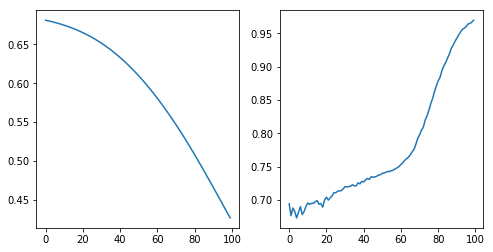

In [93]:
#history = model.fit(X_train, Y_train, epochs=10, batch_size=128, verbose=0)

import matplotlib.pyplot as plt
fig, axis = plt.subplots(1, 2,figsize=(8, 4))
axis[0].plot(history.history['loss'], label='training loss')
axis[1].plot(history.history['acc'], label='training accuracy')
plt.show()


## 2. Rol de las Capas Ocultas

Para entender el rol de las capas ocultas, intentaremos visualizar las funciones que han aprendido las diferentes neuronas del modelo.

In [0]:
import matplotlib.pyplot as plt
import matplotlib

def visualize_border(model,x,y,prob=0,title="",idx_to_plot=0):
    

    fig, axis = plt.subplots(1, 1,figsize=(12, 6))
    plt.scatter(x[:,0], x[:,1], s=1, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 0.2, x[:, 0].max() + 0.2
    y_min, y_max = x[:, 1].min() - 0.2, x[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    cmap3 =  matplotlib.colors.ListedColormap([(127/255, 150/255, 255/255), (142/255, 178/255, 255/255), (181/255, 201/255, 255/255), (214/255, 226/255, 237/255),\
    (242/255, 221/255, 160/255), (242/255, 132/255, 68/255), (229/255, 0/255, 0/255), (1, 163/255, 10/255), (1, 249/255, 20/255), (172/255, 206/255, 100/255), (125/255, 190/255, 84/255)])

    # I want to discretize the colorbar according to values
    vals = [0.0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    norm = matplotlib.colors.BoundaryNorm(vals, cmap3.N)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z[:,idx_to_plot]
    Z = Z.reshape(xx.shape)
    if prob <= 0:
      Z = Z > 0.5

    axis.contourf(xx, yy, Z ,cmap=plt.cm.YlGn)
    axis.scatter(x[:,0],x[:,1],s=5,c=y,cmap=plt.cm.YlGn,edgecolor='k', linewidth=1)

    plt.title(title)
    plt.show()
      
def visualize_border_hidden(model,x,y,n_rows,n_cols,prob=0,title=""):

    fig, axis = plt.subplots(n_rows, n_cols,figsize=(24, 12))
    print(axis.shape)
    counter = 0

    for r in range(n_rows):
        for c in range(n_cols):
            if n_cols > 1:
              current_ax = axis[r,c]
            else:
              current_ax = axis[r]
              
            current_ax.scatter(x[:,0], x[:,1], s=1, c=y, cmap=plt.cm.winter)
            h = .02 # step size in the mesh
            x_min, x_max = x[:, 0].min() - 0.2, x[:, 0].max() + 0.2
            y_min, y_max = x[:, 1].min() - 0.2, x[:, 1].max() + 0.2
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

            Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
            print(Z.shape)
            Z = Z[:,counter]
            counter +=1
            Z = Z.reshape(xx.shape)
            if prob <= 0:
              Z = Z > 0.5
            print(Z.shape)
            current_ax.contourf(xx, yy, Z ,cmap=plt.cm.YlGn)
            current_ax.scatter(x[:,0],x[:,1],s=2,c=y,cmap=plt.cm.YlGn,edgecolor='k', linewidth=1)
            #axis.contour(xx, yy, Z,levels=[-1, 0, 1])
        
        plt.title(title)
    
    plt.show()



Veremos para comenzar la función de clasificación que aprendió la neurona de salida. Como se predice una probabilidad, podemos ver en qué zonas del espacio de características la neurona predice 1 (verde, prob>0.5) o 0 (amarillo, prob <0.5).

*   ¿Es lineal la función de clasificación que aprende la neurona de salida?



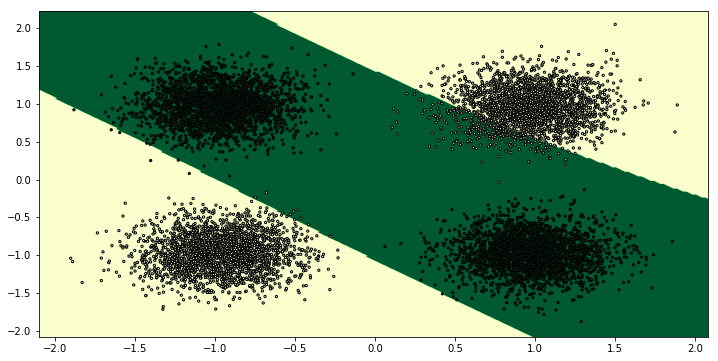

In [178]:
visualize_border(model,X_train,Y_train)


Miremos ahora las probabilidades que aprendió la neurona de salida (la probabilidad aprendida por la neurona corresponde a la probabilidad de que el dato sea de la clase 1).

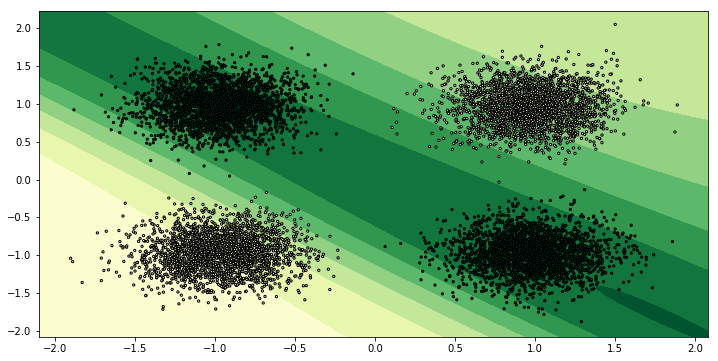

In [179]:
visualize_border(model,X_train,Y_train,prob=1)

Visualizaremos ahora la función aprendida por las 4 neuronas ocultas. Como cada una usa una función de activación sigmoidal, podemos ver en qué zonas del espacio de características la neurona retorna 1 (verde) o 0 (amarillo).

*   ¿Como se relaciona la función aprendida por las neuronas ocultas con la función de salida?



(2, 2)
(45360, 4)
(216, 210)
(45360, 4)
(216, 210)
(45360, 4)
(216, 210)
(45360, 4)
(216, 210)


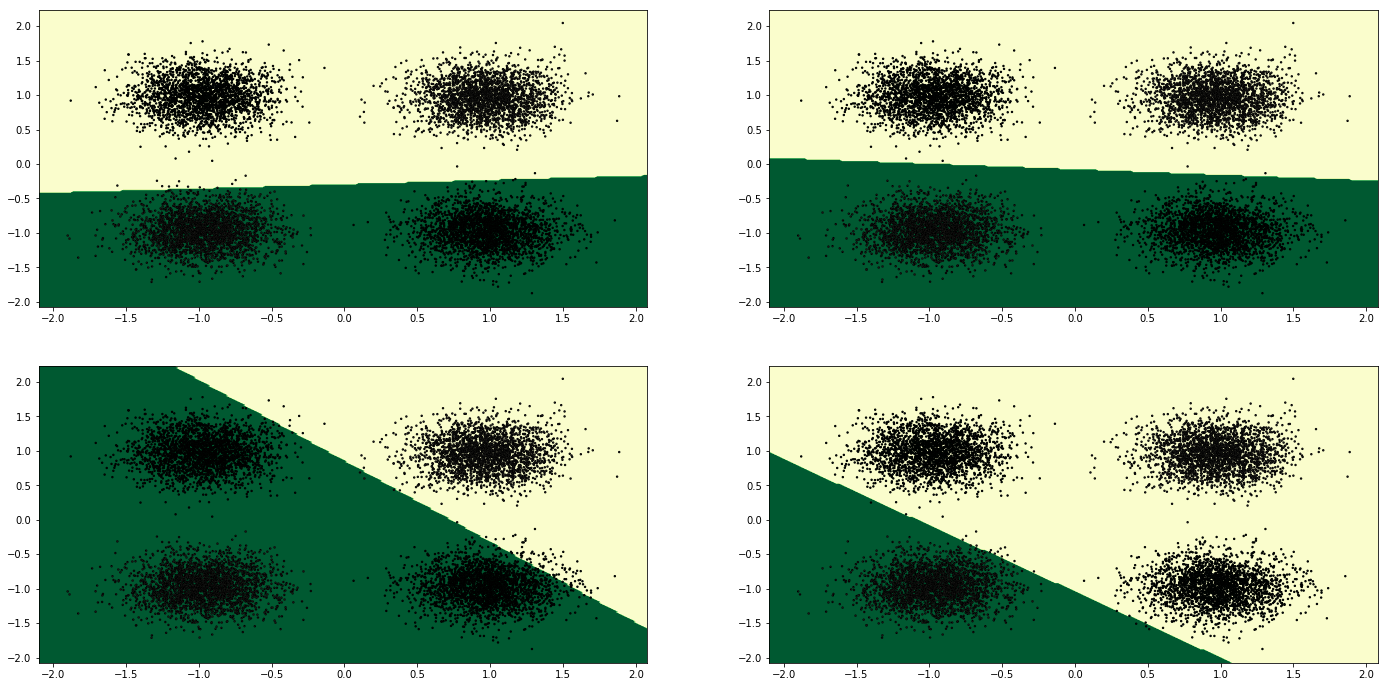

In [191]:
model2 = Sequential()
for layer in model.layers[:-1]: # just exclude last layer from copying
    model2.add(layer)
#model2.summary()

nrows = 2
ncols = 2

visualize_border_hidden(model2,X_train,Y_train,n_rows=nrows,n_cols=ncols,prob=0)




## 3. Efecto del Número de Neuronas

En esta sección evaluaremos el efecto de utilizar más o menos neuronas en la capa oculta. Aprenderemos además a monitorear la tendencia del modelo a overfitting usando un conjunto de validación.


Para todo esto usaremos un nuevo dataset sintético.

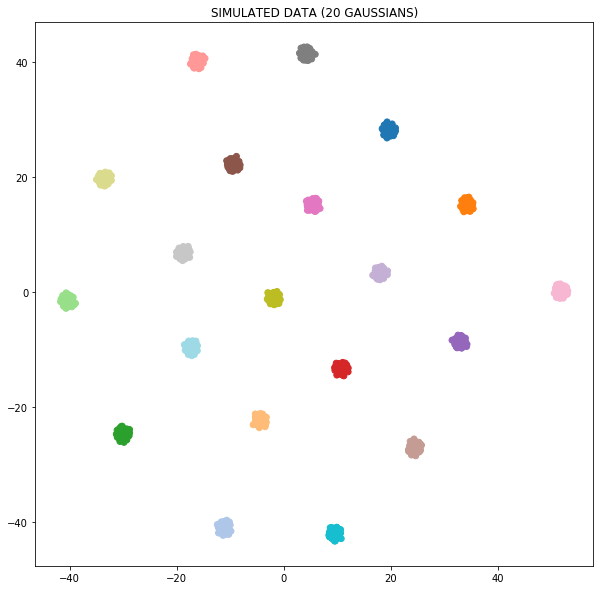

In [192]:
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)

from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)

fig, ax = plt.subplots(1,1, frameon=False, figsize=(10, 10))
y_color = y/20
ax.scatter(X_embedded[:,0],X_embedded[:,1],c=y_color,cmap=plt.cm.tab20)
ax.set_title("SIMULATED DATA (20 GAUSSIANS)")
plt.show()

y = to_categorical(y)

n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]


CREANDO UNA RED CON 1 NEURONAS OCULTAS Y 20 NEURONAS DE SALIDA
TRAIN ACC:0.168, TEST ACC:0.158
CREANDO UNA RED CON 2 NEURONAS OCULTAS Y 20 NEURONAS DE SALIDA
TRAIN ACC:0.430, TEST ACC:0.370
CREANDO UNA RED CON 3 NEURONAS OCULTAS Y 20 NEURONAS DE SALIDA
TRAIN ACC:0.770, TEST ACC:0.718
CREANDO UNA RED CON 4 NEURONAS OCULTAS Y 20 NEURONAS DE SALIDA
TRAIN ACC:0.738, TEST ACC:0.750
CREANDO UNA RED CON 5 NEURONAS OCULTAS Y 20 NEURONAS DE SALIDA
TRAIN ACC:0.958, TEST ACC:0.924
CREANDO UNA RED CON 6 NEURONAS OCULTAS Y 20 NEURONAS DE SALIDA
TRAIN ACC:1.000, TEST ACC:0.996
CREANDO UNA RED CON 7 NEURONAS OCULTAS Y 20 NEURONAS DE SALIDA
TRAIN ACC:1.000, TEST ACC:0.998
CREANDO UNA RED CON 8 NEURONAS OCULTAS Y 20 NEURONAS DE SALIDA
TRAIN ACC:0.944, TEST ACC:0.956


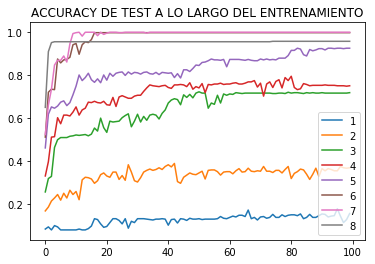

In [195]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD,Adam
from matplotlib import pyplot
 
X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

def evaluate_model(n_nodes, trainX, trainy, testX, testy):
    n_input, n_classes = trainX.shape[1], testy.shape[1]
    print("CREANDO UNA RED CON %d NEURONAS OCULTAS Y %d NEURONAS DE SALIDA"%(n_nodes,n_classes))
    
    # define model
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model on train set
    history = model.fit(trainX, trainy, epochs=100, verbose=0, validation_data=(testX, testy))
    # evaluate model on test set
    train_loss, train_acc = model.evaluate(trainX, trainy, verbose=0)
    test_loss, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc, train_acc

# evaluate model and plot learning curve with given number of nodes
num_nodes = [1, 2, 3, 4, 5, 6, 7, 8]
for n_nodes in num_nodes:
    # evaluate model with a given number of nodes
    history, acc_test, acc_train = evaluate_model(n_nodes, trainX, trainy, testX, testy)
    
    print('TRAIN ACC:%.3f, TEST ACC:%.3f' % (acc_train, acc_test))
    # plot learning curve
    #pyplot.plot(history.history['acc'], label=str(n_nodes))
    pyplot.plot(history.history['val_acc'], label=str(n_nodes))
    pyplot.title("ACCURACY DE TEST A LO LARGO DEL ENTRENAMIENTO")

    # show the plot
pyplot.legend()
pyplot.show()

Intentemos ahora visualizar la representación aprendida por la capa oculta de la red.

(500, 2)
(500, 20)


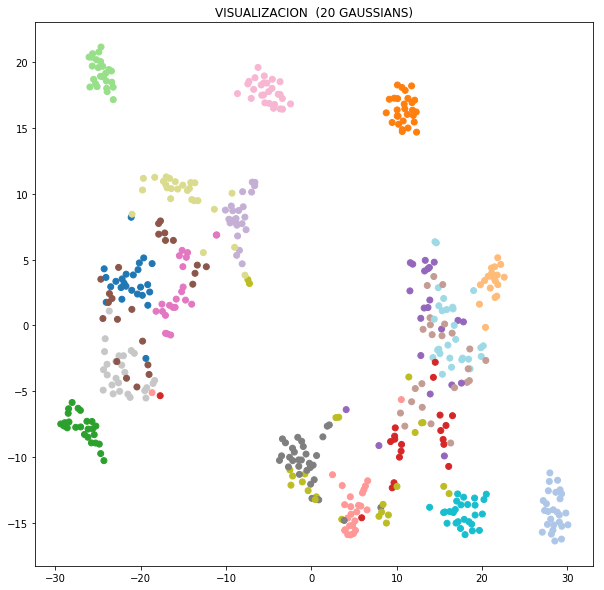

In [194]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD,Adam
from matplotlib import pyplot

n_input, n_classes = trainX.shape[1], testy.shape[1]
model = Sequential()
model.add(Dense(10, input_dim=n_input, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
opt = Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(trainX, trainy, epochs=2, verbose=0, validation_data=(testX, testy))
model2 = Sequential()
for layer in model.layers[:-1]: # just exclude last layer from copying
    model2.add(layer)

predHidden = model2.predict(trainX)
predH_embedded = TSNE(n_components=2).fit_transform(predHidden)
print(predH_embedded.shape)
print(trainy.shape)

fig, ax = plt.subplots(1,1, frameon=False, figsize=(10, 10))
y_color = np.argmax(trainy,axis=1)/20
ax.scatter(predH_embedded[:,0],predH_embedded[:,1],c=y_color,cmap=plt.cm.tab20)
ax.set_title("VISUALIZACION  (20 GAUSSIANS)")
plt.show()






## 4. Efecto del Número de Capas

En esta sección evaluaremos el efecto de utilizar más o menos capas ocultas. Aprenderemos además a monitorear la tendencia del modelo a overfitting usando un conjunto de validación.


Para todo esto usaremos el mismo dataset empleado en la sección anterior.

CREANDO UNA RED CON 1 CAPAS OCULTAS, 5 NEURONAS OCULTAS (C/U) Y 20 NEURONAS DE SALIDA
TRAIN ACCURACY: 1.000, TEST ACCURACY. 0.994
CREANDO UNA RED CON 2 CAPAS OCULTAS, 5 NEURONAS OCULTAS (C/U) Y 20 NEURONAS DE SALIDA
TRAIN ACCURACY: 1.000, TEST ACCURACY. 0.982
CREANDO UNA RED CON 3 CAPAS OCULTAS, 5 NEURONAS OCULTAS (C/U) Y 20 NEURONAS DE SALIDA
TRAIN ACCURACY: 0.999, TEST ACCURACY. 0.967
CREANDO UNA RED CON 4 CAPAS OCULTAS, 5 NEURONAS OCULTAS (C/U) Y 20 NEURONAS DE SALIDA
TRAIN ACCURACY: 0.999, TEST ACCURACY. 0.975
CREANDO UNA RED CON 5 CAPAS OCULTAS, 5 NEURONAS OCULTAS (C/U) Y 20 NEURONAS DE SALIDA
TRAIN ACCURACY: 0.997, TEST ACCURACY. 0.971


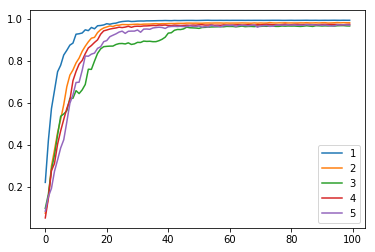

In [196]:
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
 
X, y = make_blobs(n_samples=10000, centers=20, n_features=100, cluster_std=4, random_state=2)
y = to_categorical(y)
# split into train and test
n_train = 5000
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

def evaluate_layers(n_layers, n_neurons_per_layer, trainX, trainy, testX, testy):

    n_input, n_classes = trainX.shape[1], testy.shape[1]
    
    print("CREANDO UNA RED CON %d CAPAS OCULTAS, %d NEURONAS OCULTAS (C/U) Y %d NEURONAS DE SALIDA"%(n_layers,n_neurons_per_layer,n_classes))
    
    model = Sequential()
    model.add(Dense(n_neurons_per_layer, input_dim=n_input, activation='relu')) 
    
    for _ in range(1, n_layers):
        model.add(Dense(n_neurons_per_layer, activation='relu'))
        
    model.add(Dense(n_classes, activation='softmax'))

    opt = Adam()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
 
    n_epochs = 100
    history = model.fit(trainX, trainy, epochs=n_epochs, validation_data=(testX, testy), verbose=0, batch_size=64)
    
    train_loss, train_acc = model.evaluate(trainX, trainy, verbose=0)
    test_loss, test_acc = model.evaluate(testX, testy, verbose=0)
    
    return history, test_acc, train_acc

num_layers = [1, 2, 3, 4, 5]

for n_layers in num_layers:
    n_h = 5
    history, test_accuracy, train_accuracy = evaluate_layers(n_layers, n_h, trainX, trainy, testX, testy)
    print('TRAIN ACCURACY: %.3f, TEST ACCURACY. %.3f' % (train_accuracy,test_accuracy))
    
    # plot learning curve
    pyplot.plot(history.history['val_acc'], label=str(n_layers))
    
pyplot.legend()
pyplot.show()


## 5. Desafío: Espirales Concéntricos

En esta sección usted deberá crear su propia red neuronal para un problema de juguete, pero clásico y mucho más complejo que los que hemos explorado en secciones anteriores.

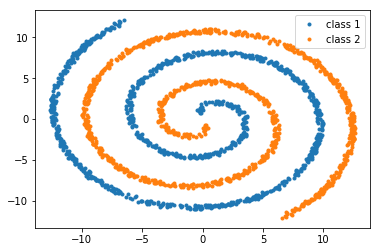

In [197]:
def twospirals(n_points, noise=.5):
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X, y = twospirals(1000)

plt.plot(X[y==0,0], X[y==0,1], '.', label='class 1')
plt.plot(X[y==1,0], X[y==1,1], '.', label='class 2')
plt.legend()
plt.show()

In [198]:
model = Sequential()
model.add(Dense(12, input_dim=2, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Fit the model
model.fit(X, y, epochs=10, batch_size=10,  verbose=1)

X_test, y_test = twospirals(1000)


Epoch 1/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6804 - acc: 0.5770
Epoch 2/10
2000/2000 [==============================] - 0s 153us/step - loss: 0.6726 - acc: 0.5855
Epoch 3/10
2000/2000 [==============================] - 0s 151us/step - loss: 0.6678 - acc: 0.5925
Epoch 4/10
2000/2000 [==============================] - 0s 154us/step - loss: 0.6639 - acc: 0.6075
Epoch 5/10
2000/2000 [==============================] - 0s 149us/step - loss: 0.6603 - acc: 0.6035
Epoch 6/10
2000/2000 [==============================] - 0s 164us/step - loss: 0.6557 - acc: 0.6290
Epoch 7/10
2000/2000 [==============================] - 0s 152us/step - loss: 0.6526 - acc: 0.6190
Epoch 8/10
2000/2000 [==============================] - 0s 154us/step - loss: 0.6488 - acc: 0.6275
Epoch 9/10
2000/2000 [==============================] - 0s 149us/step - loss: 0.6458 - acc: 0.6245
Epoch 10/10
2000/2000 [==============================] - 0s 151us/step - loss: 0.6425 - acc: 0.6170


In [200]:
yy = np.round(model.predict(X_test))
print(yy.shape)
yy = np.round(yy)
print(yy.shape)
yy = yy[:,0]
print(yy.shape)
print(np.unique(yy))


(2000, 1)
(2000, 1)
(2000,)
[0. 1.]


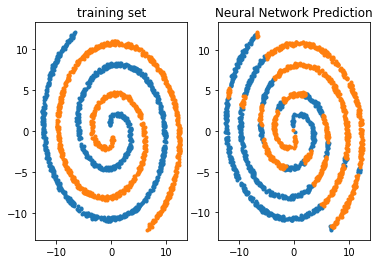

In [201]:
plt.subplot(1,2,1)
plt.title('training set')
plt.plot(X[y==0,0], X[y==0,1], '.')
plt.plot(X[y==1,0], X[y==1,1], '.')
plt.subplot(1,2,2)
plt.title('Neural Network Prediction')
plt.plot(X_test[yy==0,0], X_test[yy==0,1], '.')
plt.plot(X_test[yy==1,0], X_test[yy==1,1], '.')
plt.show()



## 6. Efecto de la Tasa de Aprendizaje y el Tamaño de Batch



En esta sección evaluaremos el efecto de la tasa de aprendizaje y el tamaño de batch.


NUMERO DE CLASES: 10
2.499836836132744
-2.0278362071610654
Tasa de Aprendizaje (Learning Rate) = 100
11.927391052246094
2.5932576656341553
Tasa de Aprendizaje (Learning Rate) = 10
3.602703809738159
2.322754144668579
Tasa de Aprendizaje (Learning Rate) = 1
2.32047176361084
1.3962478637695312
Tasa de Aprendizaje (Learning Rate) = 0.1
2.31976318359375
2.121269941329956
Tasa de Aprendizaje (Learning Rate) = 0.01
2.4569125175476074
2.4328882694244385
Tasa de Aprendizaje (Learning Rate) = 0.001
2.334698438644409
2.332547426223755


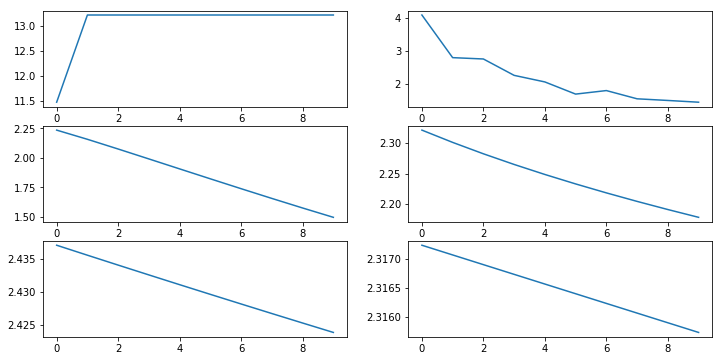

In [202]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=200, centers=10, n_features=10, cluster_std=1, random_state=2)

n_classes = len(np.unique(y))
print("NUMERO DE CLASES: %d"%n_classes)

y = to_categorical(y)

n_train = 50
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

print(np.max(trainX))
print(np.min(trainX))

def create_ann(n_h):
  model = Sequential()
  model.add(Dense(n_h, input_dim=trainX.shape[1], activation="sigmoid"))
  model.add(Dense(n_classes, activation="softmax"))
  return model
   
n_h = 20
n_epochs = 10
fig, axis = plt.subplots(3, 2, figsize=(12, 6))
axs = axis.reshape(-1)

learning_rates = [100, 10, 1, 0.1, 0.01, 0.001]

for i in range(len(learning_rates)):
  
  model = create_ann(n_h)
  opt=SGD(lr=learning_rates[i],decay=0, momentum=0, nesterov=False)
  model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
  print("Tasa de Aprendizaje (Learning Rate) = %g"%learning_rates[i])
  history = model.fit(trainX, trainy, epochs=n_epochs, batch_size=len(trainX), verbose=0, validation_data=(testX,testy))
  axs[i].plot(history.history['val_loss'], label=str(learning_rates[i]))
  train_loss, train_acc = model.evaluate(trainX, trainy, verbose=0)
  test_loss, test_acc = model.evaluate(testX, testy, verbose=0)
  print(np.max(history.history['loss']))
  print(np.min(history.history['loss']))
  #axs[i].set_ylim(0, 1)
  
plt.show()

#check momentums
momentums = [0.0, 0.5, 0.9, 0.99]

## Conclusiones de la Experiencia

Qué aprendió hoy?